In [1]:
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot

import networkx as nx
import osmnx as ox  # Assuming you want to use OSMnx for network data




In [2]:
# G = ox.graph_from_place('Shanghai, China', network_type='drive')
# G = ox.graph_from_place('Shanghai, China')
G = ox.load_graphml("/mnt/d/MyDocuments/WXRecv/WeChat Files/wxid_nsgq9j12gqso12/FileStorage/File/2023-10/ShangHai2")

In [12]:

nodes,_ = ox.graph_to_gdfs(G)

nodes

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
347648656,41.534165,122.727285,608,motorway_junction,3,POINT (122.72729 41.53416)
533216106,41.951602,123.142469,NaN,NaN,3,POINT (123.14247 41.95160)
533665871,41.690773,123.137100,NaN,NaN,3,POINT (123.13710 41.69077)
1338901665,41.692567,123.140028,NaN,NaN,3,POINT (123.14003 41.69257)
1731533428,41.568254,122.855773,NaN,NaN,3,POINT (122.85577 41.56825)
...,...,...,...,...,...,...
9158491061,41.556818,123.393869,NaN,NaN,1,POINT (123.39387 41.55682)
9308556983,41.488918,123.538293,NaN,NaN,1,POINT (123.53829 41.48892)
9334653446,41.500987,123.572618,NaN,NaN,1,POINT (123.57262 41.50099)


In [32]:
import random
origin_osmid = nodes.index.values[random.randint(0,nodes.shape[0])]
origin_osmid

8405731042

In [22]:
# nodes[['y','x']]
ls =  []
for i in range(nodes.shape[0] - 1):
    ls.append(
                    [nodes.iloc[i]['x'],nodes.iloc[i]['y']],
    )
    
with open("shenyang11.json","w+") as f:
    print([{"coords":ls}],file=f)
ls

[[122.7272851, 41.5341647],
 [123.1424693, 41.9516019],
 [123.1370996, 41.6907734],
 [123.1400281, 41.6925674],
 [122.8557727, 41.5682543],
 [122.8535611, 41.5685266],
 [123.1292174, 41.6871418],
 [123.0822098, 41.6555301],
 [123.0560586, 41.6286604],
 [122.8660643, 41.7727079],
 [122.876275, 41.7829346],
 [122.6163525, 41.5919927],
 [122.711635, 41.4661305],
 [122.6288149, 41.6016391],
 [122.671353, 41.3898509],
 [122.6985076, 41.4530099],
 [122.6518976, 41.460381],
 [122.7801636, 41.5039401],
 [122.6598654, 41.5048286],
 [122.6563997, 41.507837],
 [122.6532964, 41.5052092],
 [122.652128, 41.5052809],
 [122.6547637, 41.5130685],
 [122.6637699, 41.5020416],
 [122.6619156, 41.5094956],
 [122.6613733, 41.5061533],
 [122.9013329, 41.8127777],
 [122.8406188, 41.7654333],
 [123.1287344, 41.6871652],
 [123.1447899, 41.6937575],
 [122.6326237, 41.248066],
 [122.6326668, 41.2497425],
 [122.6669904, 41.280737],
 [122.6715339, 41.2963588],
 [122.6760898, 41.3124989],
 [122.7334336, 41.4326505],


array([ 347648656,  533216106,  533665871, ..., 9334653446, 9334653449,
       9334653451])

In [7]:
graph = G
latitude_origin, longitude_origin = G.nodes[347648656]['x'],G.nodes[347648656]['y']
latitude_destination, longitude_destination =  G.nodes[5760926825]['x'],G.nodes[5760926825]['y']

# Select origin and destination nodes
origin = ox.distance.nearest_nodes(graph, X=latitude_origin, Y=longitude_origin)
destination = ox.distance.nearest_nodes(graph, X=latitude_destination, Y=longitude_destination)

# Compute the shortest path
shortest_path = nx.shortest_path(graph, origin, destination, weight="length")
shortest_path

[347648656,
 3248688528,
 1731533477,
 1731533565,
 3937079910,
 3937081119,
 2391733483,
 2391733400,
 2391733390,
 2391733388,
 3262108953,
 4065820135,
 4065820134,
 3262109361,
 6612462321,
 6543263456,
 6543263460,
 2405721308,
 2405719888,
 2405719897,
 1606498628,
 3729647004,
 2391707938,
 2449052615,
 2405717068,
 2405717064,
 2405717063,
 533665021,
 1553975790,
 1759230146,
 6081540959,
 370273325,
 370273310,
 2143139909,
 4049188833,
 370273249,
 370273250,
 1806800142,
 370273198,
 370273196,
 2458114612,
 370273171,
 5885201237,
 1759229088,
 5290983649,
 1457585393,
 1457585292,
 7554443624,
 7554443629,
 5265926469,
 5265926461,
 5265926460,
 8405730853,
 5265926459,
 8404424825,
 8404424850,
 8404424843,
 8404424846,
 8307883795,
 5265940324,
 5265940323,
 9945442070,
 5265939219,
 5366528919,
 7554096720,
 7554096721,
 5265939207,
 5265939180,
 5265939200,
 5265939154,
 5265939201,
 5265939150,
 7554088225,
 6395817106,
 7554088226,
 5265939206,
 370271538,
 18529430

In [8]:
import numpy as np
points = []

for id in shortest_path:
	points.append([G.nodes[id]['x'],G.nodes[id]['y']])
points = np.array(points)
points

array([[122.7272851,  41.5341647],
       [122.7382657,  41.5374384],
       [122.8400451,  41.5782869],
       [122.8476401,  41.5837059],
       [122.8791677,  41.6026633],
       [122.8913236,  41.6132633],
       [123.0263632,  41.6908434],
       [123.0338857,  41.6928324],
       [123.0343577,  41.6931769],
       [123.0350427,  41.6933712],
       [123.0359244,  41.6932333],
       [123.0608351,  41.6886185],
       [123.0610988,  41.6885582],
       [123.0698041,  41.6979095],
       [123.0967807,  41.7133183],
       [123.1312836,  41.7318862],
       [123.1421554,  41.7377598],
       [123.1440568,  41.7387838],
       [123.1516337,  41.7432133],
       [123.1584262,  41.7477341],
       [123.1635932,  41.751187 ],
       [123.1805044,  41.7578766],
       [123.181063 ,  41.7579868],
       [123.1915147,  41.7600482],
       [123.1980078,  41.7612373],
       [123.1996263,  41.761453 ],
       [123.2074653,  41.7622116],
       [123.2134134,  41.7627499],
       [123.2197649,

In [55]:

edges_sh.name

u           v           key
347648656   2875558858  0       NaN
            3248688528  0      京哈高速
533216106   2675879624  0       十大线
            9873463517  0       十大线
            9894253087  0       后三线
                               ... 
9158491061  9158490712  0       NaN
9308556983  8676345956  0       NaN
9334653446  2311244500  0       NaN
9334653449  2311244500  0       NaN
9334653451  2311244422  0       NaN
Name: name, Length: 47299, dtype: object

In [20]:
# points[['y','x']]
ls =  []
for i in range(len(points) - 1):
    ls.append(
        [points[i][0],points[i][1]]
    )
    
with open("shenyang11.json","w+") as f:
    print([{"coords":ls}],file=f)
ls

[[122.7272851, 41.5341647],
 [122.7382657, 41.5374384],
 [122.8400451, 41.5782869],
 [122.8476401, 41.5837059],
 [122.8791677, 41.6026633],
 [122.8913236, 41.6132633],
 [123.0263632, 41.6908434],
 [123.0338857, 41.6928324],
 [123.0343577, 41.6931769],
 [123.0350427, 41.6933712],
 [123.0359244, 41.6932333],
 [123.0608351, 41.6886185],
 [123.0610988, 41.6885582],
 [123.0698041, 41.6979095],
 [123.0967807, 41.7133183],
 [123.1312836, 41.7318862],
 [123.1421554, 41.7377598],
 [123.1440568, 41.7387838],
 [123.1516337, 41.7432133],
 [123.1584262, 41.7477341],
 [123.1635932, 41.751187],
 [123.1805044, 41.7578766],
 [123.181063, 41.7579868],
 [123.1915147, 41.7600482]]

In [ ]:
# if "bpy" in locals():
#     import importlib
#     importlib.reload(bpy)
# else:
#     import bpy


True

In [21]:
import sklearn
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot
import numpy as np
ox.__version__
import bpy
import networkx as nx


import osmnx as ox  # Assuming you want to use OSMnx for network data
G =  ox.load_graphml(r"/mnt/d/MyDocuments/WXRecv/WeChat Files/wxid_nsgq9j12gqso12/FileStorage/File/2023-10/ShangHai2")
graph = G
latitude_origin, longitude_origin = G.nodes[347648656]['x'],G.nodes[347648656]['y']
latitude_destination, longitude_destination =  G.nodes[9334653446]['x'],G.nodes[9334653446]['y']

# Select origin and destination nodes
origin = ox.distance.nearest_nodes(graph, X=latitude_origin, Y=longitude_origin)
destination = ox.distance.nearest_nodes(graph, X=latitude_destination, Y=longitude_destination)

# Compute the shortest path
shortest_path = nx.shortest_path(graph, origin, destination, weight="length")
shortest_path
  

points = []

for id in shortest_path:
    points.append((G.nodes[id]['x'],G.nodes[id]['y'],0))
points = np.array(points)

  


In [28]:
# G.edges
G.nodes.items().to_

ItemsView(NodeView((347648656, 533216106, 533665871, 1338901665, 1731533428, 1731533432, 1882295645, 1882295648, 1882295658, 1882306356, 1882306450, 2176797569, 2176797581, 2276407630, 2276922825, 2276931995, 2276932042, 2279157860, 2282181508, 2282181509, 2282181513, 2282181538, 2282181547, 2282181549, 2282181555, 2282181598, 2291104543, 2291127700, 2405296207, 2405725329, 2485494376, 2485494377, 2485494382, 2485494383, 2485494384, 2485494398, 2485494399, 2485494418, 2485494444, 2485494453, 2485494455, 2485494456, 2485494466, 2485494481, 2485494482, 2485494535, 2485494537, 2485494539, 2485494554, 2485494558, 2485494570, 2485494573, 2485494576, 2485494584, 2485494587, 2485494591, 2485494592, 2485494594, 2485494598, 2485494605, 2485494642, 2485494656, 2485494683, 2485494721, 2594876343, 2614930330, 2614930336, 2614930369, 2614930372, 2614930383, 2614930422, 2614930461, 2614930507, 2614930512, 2614930515, 2614930537, 2614930597, 2614930611, 2614930612, 2614930633, 2614930645, 2675879624,

In [ ]:
points[:,0]


array([122.7272851, 122.7382657, 122.8400451, 122.8476401, 122.8791677,
       122.8913236, 123.0263632, 123.0338857, 123.0343577, 123.0350427,
       123.0359244, 123.0608351, 123.0610988, 123.0698041, 123.0967807,
       123.1312836, 123.1421554, 123.1440568, 123.1516337, 123.1584262,
       123.1635932, 123.1805044, 123.181063 , 123.1915147, 123.1980078,
       123.1996263, 123.2074653, 123.2134134, 123.2197649, 123.2288359,
       123.234206 , 123.2389632, 123.2398746, 123.2400984, 123.2510004,
       123.25641  , 123.2631356, 123.2638178, 123.2643493, 123.2674915,
       123.2757892, 123.2789826, 123.2791835, 123.2798889, 123.2839145,
       123.2877325, 123.293776 , 123.2994006, 123.3019801, 123.3082875,
       123.3202363, 123.3206185, 123.3234235, 123.3251528, 123.3259438,
       123.327667 , 123.3319153, 123.3320356, 123.3328633, 123.3356352,
       123.3358405, 123.3370251, 123.3409256, 123.3456323, 123.3457521,
       123.3494885, 123.3543689, 123.3545653, 123.363106 , 123.3

In [30]:
nodes_sh,edges_sh=ox.graph_to_gdfs(G)

In [33]:
nodes_sh.index.values


array([ 347648656,  533216106,  533665871, ..., 9334653446, 9334653449,
       9334653451])

In [ ]:

edges = []
for ll in range(edges_sh.shape[0]):
    edge = edges_sh.iloc[ll].name
    edge = (edge[0],edge[1],edges_sh.iloc[ll].length)
    
    edges.append(edge)
    
edges

[(347648656, 2875558858, 853.1249999999999),
 (347648656, 3248688528, 984.4679999999998),
 (533216106, 2675879624, 7628.333),
 (533216106, 9873463517, 639.968),
 (533216106, 9894253087, 643.8789999999999),
 (533665871, 2840176177, 334.6),
 (533665871, 6543553007, 127.237),
 (1338901665, 533665871, 315.698),
 (1338901665, 2405725328, 539.707),
 (1731533428, 4053693590, 109.272),
 (1731533428, 3937493149, 3989.74),
 (1731533428, 1731533432, 189.44199999999998),
 (1731533432, 4053693590, 97.013),
 (1731533432, 1731533428, 189.44199999999998),
 (1731533432, 4088701827, 2855.4849999999997),
 (1882295645, 2405296207, 40.192),
 (1882295645, 5265926509, 13.173),
 (1882295648, 6543303569, 71.052),
 (1882295648, 5265928848, 11.94),
 (1882295658, 6543303874, 392.394),
 (1882295658, 3232990034, 531.15),
 (1882306356, 2291127700, 2269.727),
 (1882306356, 7948018795, 1293.4730000000002),
 (1882306356, 1882306377, 2856.198),
 (1882306450, 7948018795, 219.063),
 (1882306450, 3379291751, 2282.622999999

In [ ]:
edges = np.array(edges)

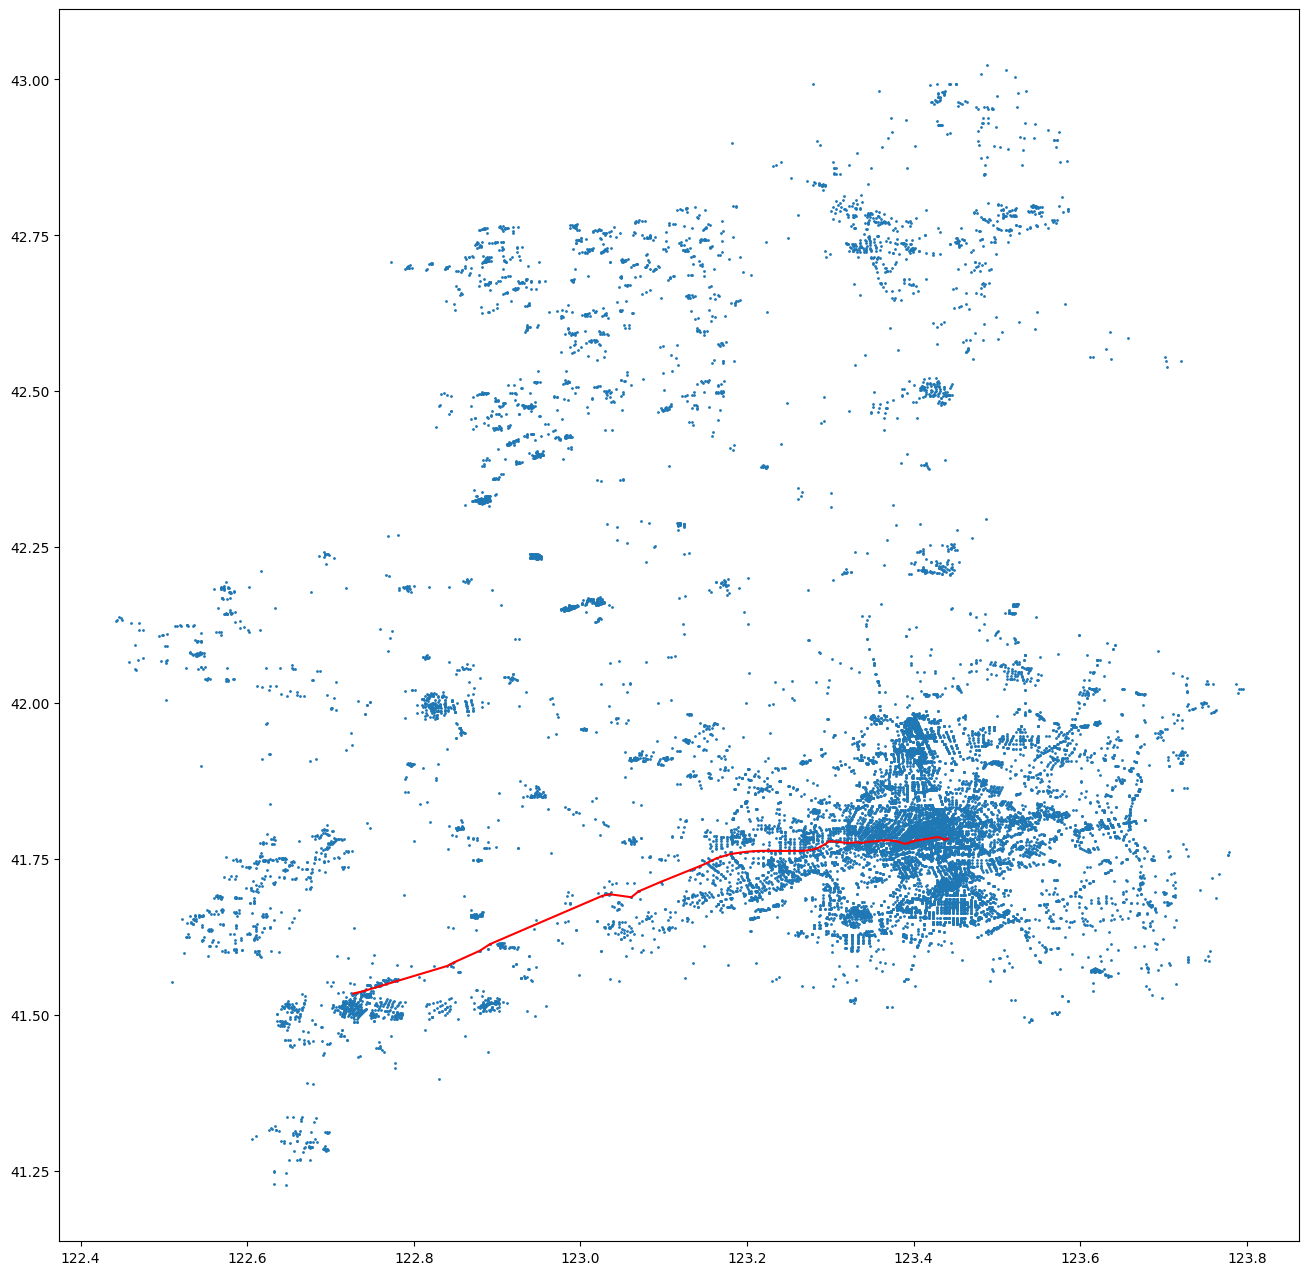

In [ ]:
nodes_sh
import matplotlib.animation as ma
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))




MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x7fe1a357c550> (for post_execute):


IndexError: arrays used as indices must be of integer (or boolean) type

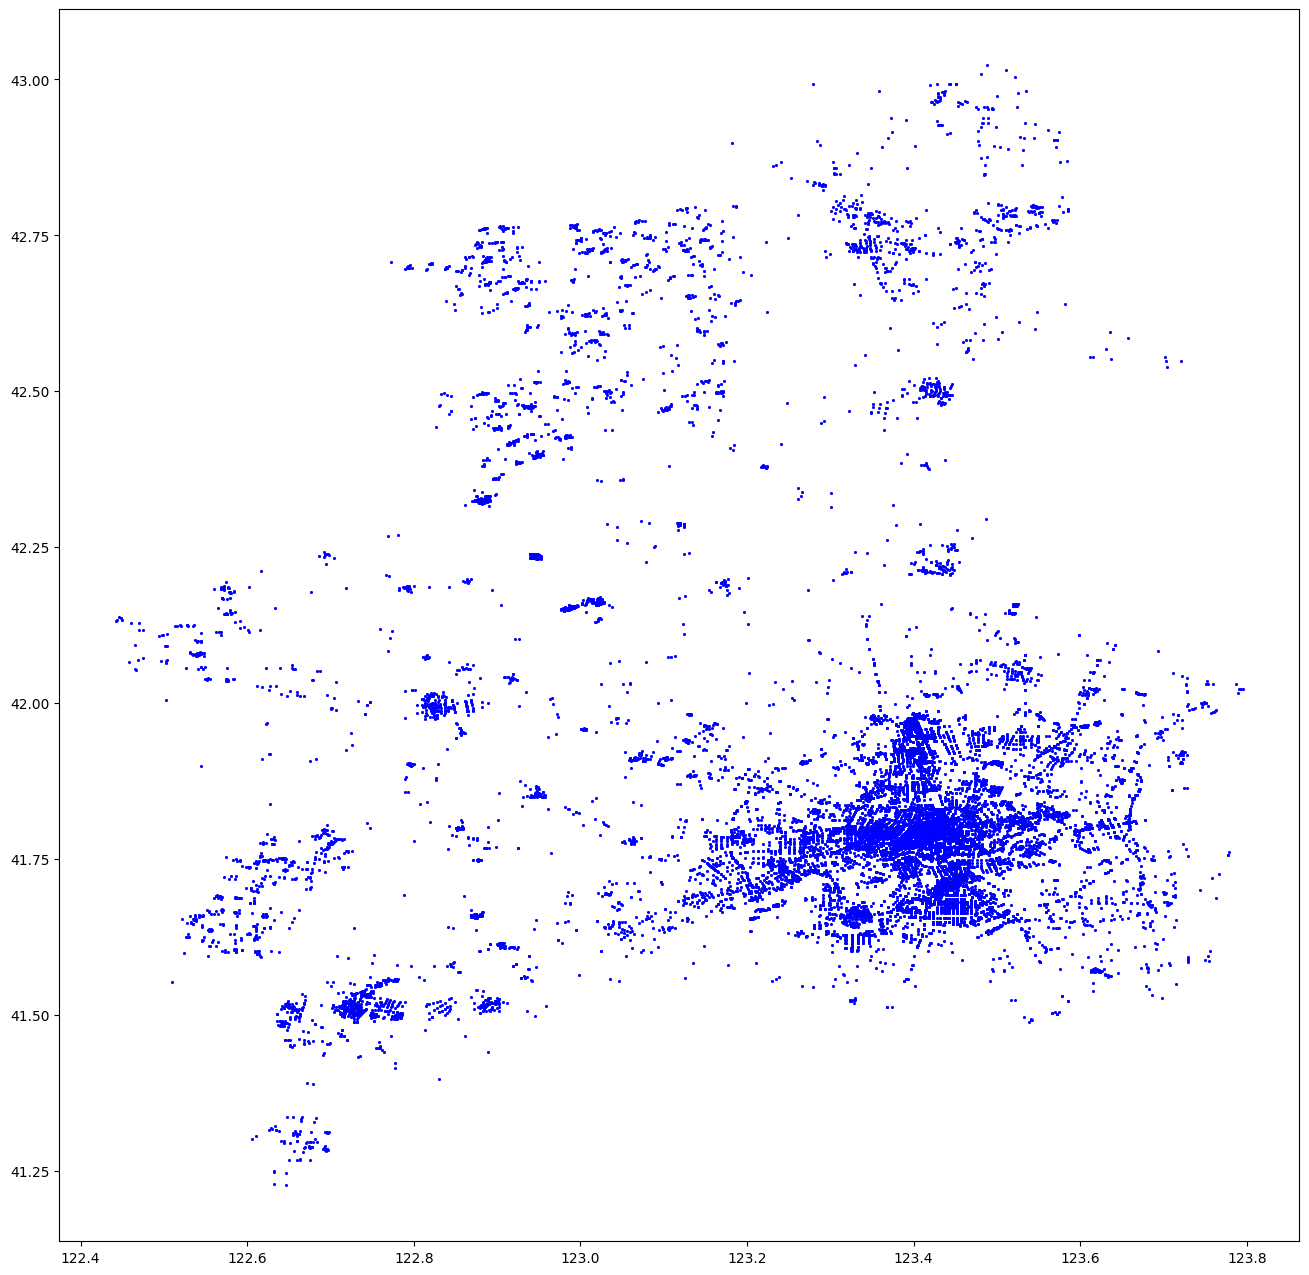

In [ ]:
# path = ox.routing.shortest_path(G, 347648656, 5760926825)


fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1, 1, 1)

def func(frame):
	ax.scatter(nodes_sh['x'],nodes_sh['y'],s=1,c='blue')
	ax.plot(points[0:frame,0],points[0:frame,1],c='red')
	print(f"{frame} / {len(shortest_path)}",end='\r')
	# ox.plot.plot_graph_route(G, shortest_path[int(frame):],ax=ax)
    
ma.FuncAnimation(fig, func, 50).save('1.gif')


In [ ]:
bpy.context.selectable_objects

[bpy.data.objects['Cube'],
 bpy.data.objects['Light'],
 bpy.data.objects['Camera'],
 bpy.data.objects['Plane']]

In [ ]:
G